## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9784208	total: 48.2ms	remaining: 48.2s
1:	learn: 0.9585959	total: 49.3ms	remaining: 24.6s
2:	learn: 0.9370855	total: 50.5ms	remaining: 16.8s
3:	learn: 0.9220768	total: 51.6ms	remaining: 12.8s
4:	learn: 0.9039826	total: 52.7ms	remaining: 10.5s
5:	learn: 0.8877367	total: 53.8ms	remaining: 8.92s
6:	learn: 0.8693661	total: 54.8ms	remaining: 7.78s
7:	learn: 0.8510695	total: 55.8ms	remaining: 6.92s
8:	learn: 0.8357151	total: 56.8ms	remaining: 6.25s
9:	learn: 0.8177849	total: 57.7ms	remaining: 5.72s
10:	learn: 0.8031220	total: 58.8ms	remaining: 5.28s
11:	learn: 0.7876409	total: 59.7ms	remaining: 4.91s
12:	learn: 0.7724271	total: 60.6ms	remaining: 4.6s
13:	learn: 0.7580398	total: 61.7ms	remaining: 4.35s
14:	learn: 0.7458377	total: 62.7ms	remaining: 4.12s
15:	learn: 0.7317479	total: 63.8ms	remaining: 3.92s
16:	learn: 0.7180901	total: 64.8ms	remaining: 3.75s
17:	learn: 0.7054340	total: 65.8ms	remaining: 3.59s
18:	learn: 0.6934667	total: 66.8ms	remaining: 

87:	learn: 0.3313728	total: 144ms	remaining: 1.49s
88:	learn: 0.3288861	total: 145ms	remaining: 1.49s
89:	learn: 0.3262247	total: 146ms	remaining: 1.48s
90:	learn: 0.3245382	total: 147ms	remaining: 1.47s
91:	learn: 0.3228055	total: 148ms	remaining: 1.46s
92:	learn: 0.3215274	total: 149ms	remaining: 1.46s
93:	learn: 0.3200547	total: 151ms	remaining: 1.45s
94:	learn: 0.3178700	total: 152ms	remaining: 1.44s
95:	learn: 0.3165428	total: 152ms	remaining: 1.44s
96:	learn: 0.3151370	total: 154ms	remaining: 1.43s
97:	learn: 0.3132711	total: 155ms	remaining: 1.42s
98:	learn: 0.3118300	total: 156ms	remaining: 1.42s
99:	learn: 0.3102598	total: 157ms	remaining: 1.41s
100:	learn: 0.3089072	total: 158ms	remaining: 1.41s
101:	learn: 0.3071267	total: 159ms	remaining: 1.4s
102:	learn: 0.3058656	total: 160ms	remaining: 1.39s
103:	learn: 0.3042791	total: 161ms	remaining: 1.39s
104:	learn: 0.3027374	total: 162ms	remaining: 1.38s
105:	learn: 0.3010681	total: 163ms	remaining: 1.38s
106:	learn: 0.2996465	tota

211:	learn: 0.2135303	total: 276ms	remaining: 1.03s
212:	learn: 0.2132512	total: 278ms	remaining: 1.02s
213:	learn: 0.2129177	total: 279ms	remaining: 1.02s
214:	learn: 0.2125063	total: 280ms	remaining: 1.02s
215:	learn: 0.2114426	total: 281ms	remaining: 1.02s
216:	learn: 0.2108867	total: 282ms	remaining: 1.02s
217:	learn: 0.2103310	total: 283ms	remaining: 1.01s
218:	learn: 0.2097518	total: 284ms	remaining: 1.01s
219:	learn: 0.2094556	total: 285ms	remaining: 1.01s
220:	learn: 0.2088427	total: 286ms	remaining: 1.01s
221:	learn: 0.2083053	total: 287ms	remaining: 1.01s
222:	learn: 0.2077557	total: 288ms	remaining: 1s
223:	learn: 0.2068607	total: 290ms	remaining: 1s
224:	learn: 0.2061223	total: 291ms	remaining: 1s
225:	learn: 0.2057802	total: 292ms	remaining: 999ms
226:	learn: 0.2050543	total: 293ms	remaining: 998ms
227:	learn: 0.2043001	total: 294ms	remaining: 996ms
228:	learn: 0.2038732	total: 295ms	remaining: 994ms
229:	learn: 0.2034891	total: 296ms	remaining: 992ms
230:	learn: 0.2031137

331:	learn: 0.1586695	total: 406ms	remaining: 818ms
332:	learn: 0.1583406	total: 408ms	remaining: 817ms
333:	learn: 0.1580059	total: 409ms	remaining: 815ms
334:	learn: 0.1577662	total: 410ms	remaining: 813ms
335:	learn: 0.1576733	total: 411ms	remaining: 812ms
336:	learn: 0.1574806	total: 412ms	remaining: 810ms
337:	learn: 0.1571398	total: 413ms	remaining: 808ms
338:	learn: 0.1568821	total: 414ms	remaining: 807ms
339:	learn: 0.1568136	total: 415ms	remaining: 805ms
340:	learn: 0.1565914	total: 416ms	remaining: 804ms
341:	learn: 0.1562716	total: 417ms	remaining: 802ms
342:	learn: 0.1561634	total: 418ms	remaining: 800ms
343:	learn: 0.1555952	total: 419ms	remaining: 799ms
344:	learn: 0.1553998	total: 420ms	remaining: 797ms
345:	learn: 0.1550866	total: 421ms	remaining: 795ms
346:	learn: 0.1547964	total: 422ms	remaining: 794ms
347:	learn: 0.1546690	total: 423ms	remaining: 792ms
348:	learn: 0.1545691	total: 424ms	remaining: 790ms
349:	learn: 0.1541865	total: 425ms	remaining: 789ms
350:	learn: 

459:	learn: 0.1274249	total: 542ms	remaining: 636ms
460:	learn: 0.1271664	total: 543ms	remaining: 635ms
461:	learn: 0.1268957	total: 544ms	remaining: 634ms
462:	learn: 0.1266087	total: 545ms	remaining: 632ms
463:	learn: 0.1263128	total: 546ms	remaining: 631ms
464:	learn: 0.1261998	total: 547ms	remaining: 630ms
465:	learn: 0.1258981	total: 548ms	remaining: 628ms
466:	learn: 0.1258353	total: 550ms	remaining: 627ms
467:	learn: 0.1256095	total: 551ms	remaining: 626ms
468:	learn: 0.1253116	total: 552ms	remaining: 625ms
469:	learn: 0.1250779	total: 553ms	remaining: 623ms
470:	learn: 0.1248315	total: 554ms	remaining: 622ms
471:	learn: 0.1245729	total: 555ms	remaining: 621ms
472:	learn: 0.1243278	total: 556ms	remaining: 620ms
473:	learn: 0.1239764	total: 557ms	remaining: 618ms
474:	learn: 0.1238154	total: 558ms	remaining: 617ms
475:	learn: 0.1234833	total: 559ms	remaining: 616ms
476:	learn: 0.1231524	total: 560ms	remaining: 614ms
477:	learn: 0.1229610	total: 561ms	remaining: 613ms
478:	learn: 

584:	learn: 0.1012488	total: 675ms	remaining: 479ms
585:	learn: 0.1012001	total: 677ms	remaining: 478ms
586:	learn: 0.1010348	total: 678ms	remaining: 477ms
587:	learn: 0.1010190	total: 679ms	remaining: 475ms
588:	learn: 0.1008142	total: 680ms	remaining: 474ms
589:	learn: 0.1006167	total: 681ms	remaining: 473ms
590:	learn: 0.1005636	total: 682ms	remaining: 472ms
591:	learn: 0.1002956	total: 683ms	remaining: 470ms
592:	learn: 0.0999562	total: 684ms	remaining: 469ms
593:	learn: 0.0997149	total: 685ms	remaining: 468ms
594:	learn: 0.0994622	total: 686ms	remaining: 467ms
595:	learn: 0.0993195	total: 687ms	remaining: 465ms
596:	learn: 0.0991111	total: 688ms	remaining: 464ms
597:	learn: 0.0989197	total: 689ms	remaining: 463ms
598:	learn: 0.0986823	total: 690ms	remaining: 462ms
599:	learn: 0.0985004	total: 691ms	remaining: 461ms
600:	learn: 0.0983643	total: 692ms	remaining: 459ms
601:	learn: 0.0981859	total: 693ms	remaining: 458ms
602:	learn: 0.0979622	total: 694ms	remaining: 457ms
603:	learn: 

709:	learn: 0.0836117	total: 810ms	remaining: 331ms
710:	learn: 0.0834250	total: 811ms	remaining: 330ms
711:	learn: 0.0832861	total: 812ms	remaining: 329ms
712:	learn: 0.0831456	total: 813ms	remaining: 327ms
713:	learn: 0.0830028	total: 814ms	remaining: 326ms
714:	learn: 0.0828871	total: 815ms	remaining: 325ms
715:	learn: 0.0828391	total: 816ms	remaining: 324ms
716:	learn: 0.0827691	total: 817ms	remaining: 323ms
717:	learn: 0.0826259	total: 818ms	remaining: 321ms
718:	learn: 0.0825620	total: 819ms	remaining: 320ms
719:	learn: 0.0824188	total: 820ms	remaining: 319ms
720:	learn: 0.0823551	total: 821ms	remaining: 318ms
721:	learn: 0.0822626	total: 822ms	remaining: 317ms
722:	learn: 0.0822484	total: 823ms	remaining: 315ms
723:	learn: 0.0821813	total: 824ms	remaining: 314ms
724:	learn: 0.0820044	total: 825ms	remaining: 313ms
725:	learn: 0.0818334	total: 826ms	remaining: 312ms
726:	learn: 0.0816586	total: 827ms	remaining: 311ms
727:	learn: 0.0815952	total: 828ms	remaining: 309ms
728:	learn: 

835:	learn: 0.0694087	total: 940ms	remaining: 184ms
836:	learn: 0.0692869	total: 941ms	remaining: 183ms
837:	learn: 0.0691922	total: 942ms	remaining: 182ms
838:	learn: 0.0690176	total: 943ms	remaining: 181ms
839:	learn: 0.0688621	total: 944ms	remaining: 180ms
840:	learn: 0.0688312	total: 945ms	remaining: 179ms
841:	learn: 0.0686887	total: 946ms	remaining: 178ms
842:	learn: 0.0685235	total: 947ms	remaining: 176ms
843:	learn: 0.0684362	total: 949ms	remaining: 175ms
844:	learn: 0.0683159	total: 950ms	remaining: 174ms
845:	learn: 0.0682060	total: 951ms	remaining: 173ms
846:	learn: 0.0681519	total: 952ms	remaining: 172ms
847:	learn: 0.0681147	total: 953ms	remaining: 171ms
848:	learn: 0.0679654	total: 954ms	remaining: 170ms
849:	learn: 0.0678298	total: 955ms	remaining: 168ms
850:	learn: 0.0677078	total: 956ms	remaining: 167ms
851:	learn: 0.0676207	total: 956ms	remaining: 166ms
852:	learn: 0.0674765	total: 957ms	remaining: 165ms
853:	learn: 0.0674160	total: 958ms	remaining: 164ms
854:	learn: 

963:	learn: 0.0576957	total: 1.07s	remaining: 40.1ms
964:	learn: 0.0576130	total: 1.08s	remaining: 39ms
965:	learn: 0.0575324	total: 1.08s	remaining: 37.9ms
966:	learn: 0.0574357	total: 1.08s	remaining: 36.8ms
967:	learn: 0.0572999	total: 1.08s	remaining: 35.7ms
968:	learn: 0.0572200	total: 1.08s	remaining: 34.6ms
969:	learn: 0.0571891	total: 1.08s	remaining: 33.4ms
970:	learn: 0.0571137	total: 1.08s	remaining: 32.3ms
971:	learn: 0.0569449	total: 1.08s	remaining: 31.2ms
972:	learn: 0.0568786	total: 1.08s	remaining: 30.1ms
973:	learn: 0.0567953	total: 1.08s	remaining: 29ms
974:	learn: 0.0566882	total: 1.09s	remaining: 27.9ms
975:	learn: 0.0566170	total: 1.09s	remaining: 26.7ms
976:	learn: 0.0565619	total: 1.09s	remaining: 25.6ms
977:	learn: 0.0564497	total: 1.09s	remaining: 24.5ms
978:	learn: 0.0563564	total: 1.09s	remaining: 23.4ms
979:	learn: 0.0562693	total: 1.09s	remaining: 22.3ms
980:	learn: 0.0562386	total: 1.09s	remaining: 21.2ms
981:	learn: 0.0561758	total: 1.09s	remaining: 20ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

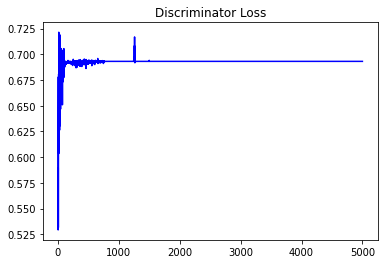

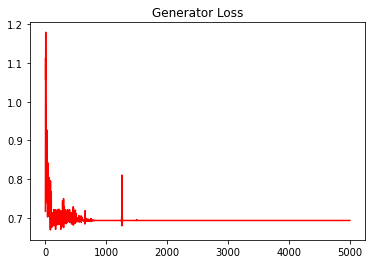

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

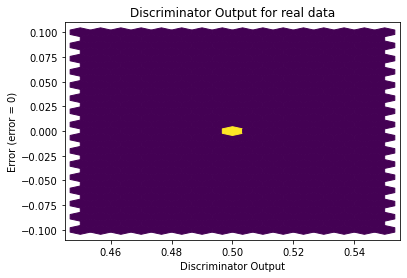

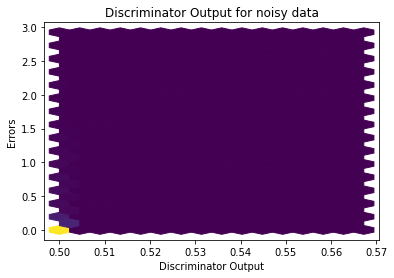

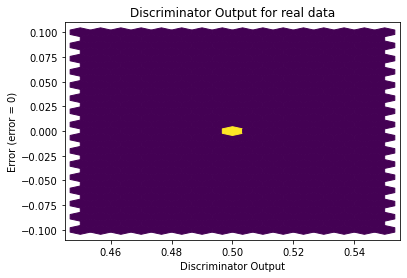

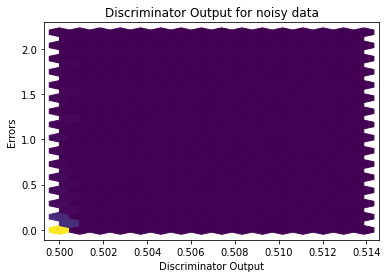

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


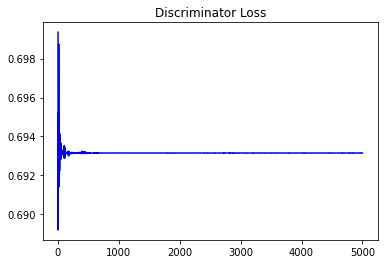

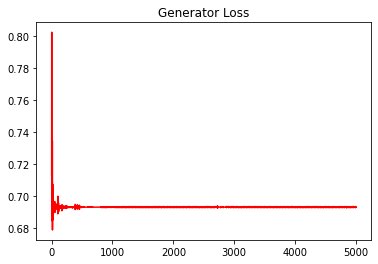

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

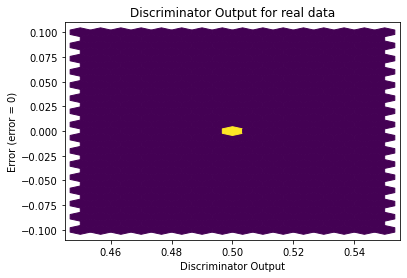

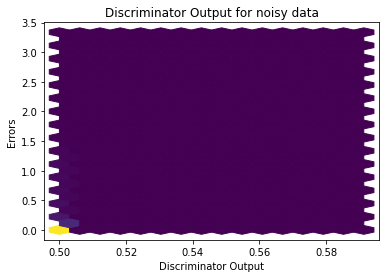

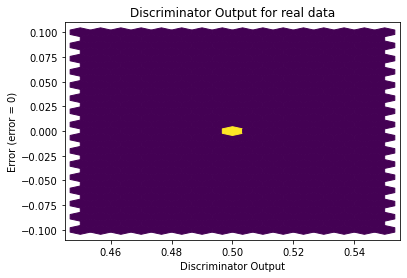

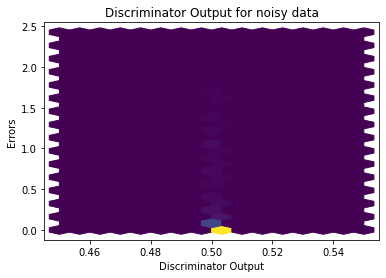

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0294]], device='cuda:0', requires_grad=True)
